# **Cycle Analyzer**

### Importing the required packages

In [1]:
import pandas as pd 
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Plotting my application cycle

In [2]:
# Setting the main file directory
main_dir = "C:/Users/TooFastDan/Documents/MD_PhD Application/Cycle Analyzer"

In [4]:
# Importing the excel doc and processing it
dan = pd.read_excel(main_dir+"/example_excel_files/Dan's Application Cycle Dark.xlsx")

# Getting the actions (column) names and melting the df into a favorable format
column_names = list(dan.columns)
column_names = [s.lower() for s in column_names]
dan.columns = column_names
column_names.remove("schools")
dan = dan.melt(id_vars="schools", value_vars=column_names, var_name="Actions", value_name="Dates")
dan["Dates"] = pd.to_datetime(dan["Dates"])

# Grouping by application actions and sorting by date
dan_gb1 = dan.groupby("Actions")
dan_sort_list1 = []
for name, group in dan_gb1:
    group = group.sort_values("Dates", ascending=True)
    dan_sort_list1.append(group)
dan_sort1 = pd.concat(dan_sort_list1, axis=0).reset_index(drop=True)

# Ranking the events by date, ignoring dates that are not present
numbers = []
for action in dan_sort1["Actions"].unique():
    n = 0
    df = dan_sort1[dan_sort1["Actions"]==action]
    for d in df["Dates"]:
        if pd.isnull(d):
            n = n
            numbers.append(n)
        else:
            n = n + 1
            numbers.append(n)
dan_sort1["tracker"] = numbers

# Adding the start date of the cycle and the current date and sorting
start = datetime.datetime(2021, 5, 28)  #AMCAS primary submission
start = pd.to_datetime(start)
now = datetime.datetime.now()  #current date 
now = now.strftime("%m/%d/%Y %H:%M:%S")
now = pd.to_datetime(now)
dan_gb2 = dan_sort1.groupby("Actions")
dan_sort_list2 = []
for name, group in dan_gb2:
    df1 = {"schools":"Start", "Actions":group["Actions"].unique()[0], "Dates":start, "tracker":0}
    df2 = {"schools":"End", "Actions":group["Actions"].unique()[0], "Dates":now, "tracker":np.max(group["tracker"])}
    group = group.append([df1, df2], ignore_index=True)
    group = group.sort_values("Dates", ascending=True)
    dan_sort_list2.append(group)
dan_sort2 = pd.concat(dan_sort_list2, axis=0).reset_index(drop=True)

# Displaying the finalized df and optionally exporting to excel
display(dan_sort2)
#dan_sort2.to_excel(main_dir+"/Dan's Application Cycle Processed.xlsx", index=False)

schools     Actions               Dates  tracker
0                       Start  acceptance 2021-05-28 00:00:00        0
1          University of Iowa  acceptance 2021-12-01 00:00:00        1
2                      Baylor  acceptance 2021-12-23 00:00:00        2
3                         End  acceptance 2022-01-18 01:16:17        2
4                     Harvard  acceptance                 NaT        2
..                        ...         ...                 ...      ...
243        University of Utah    withdraw                 NaT        2
244           UT Southwestern    withdraw                 NaT        2
245   University of Wisconsin    withdraw                 NaT        2
246  University of Pittsburgh    withdraw                 NaT        2
247        University of Iowa    withdraw                 NaT        2

[248 rows x 4 columns]

### Plotting the Application Cycle as a line graph

In [5]:
action_color_dict = {}
for action in sorted(column_names):
    hex_color = input(f"Enter a hex color to represent {action}:")
    action_color_dict[action] = hex_color
action_color_dict

Enter a hex color to represent acceptance: 
Enter a hex color to represent interview: 
Enter a hex color to represent interview invite: 
Enter a hex color to represent rejection: 
Enter a hex color to represent secondary invite: 
Enter a hex color to represent secondary submission: 
Enter a hex color to represent waitlist: 
Enter a hex color to represent withdraw: 


{'acceptance': '',
 'interview': '',
 'interview invite': '',
 'rejection': '',
 'secondary invite': '',
 'secondary submission': '',
 'waitlist': '',
 'withdraw': ''}

In [34]:
response = input("Do you want a light-mode or dark-mode graph:")
response_dict = {"light": "simple_white", "dark": "plotly_dark"}
response_answer = response_dict[response]
response_answer

Do you want a light-mode or dark-mode graph: light


'simple_white'

In [6]:
color_map = {"acceptance": "#00ff44", "interview": "#3064ff", "interview invite": "#87cfff", "rejection": "#ff0000", "secondary invite": "#faf614", "secondary submission": "#9afa14", "waitlist": "#fa14aa", "withdraw": "#9e959b"}

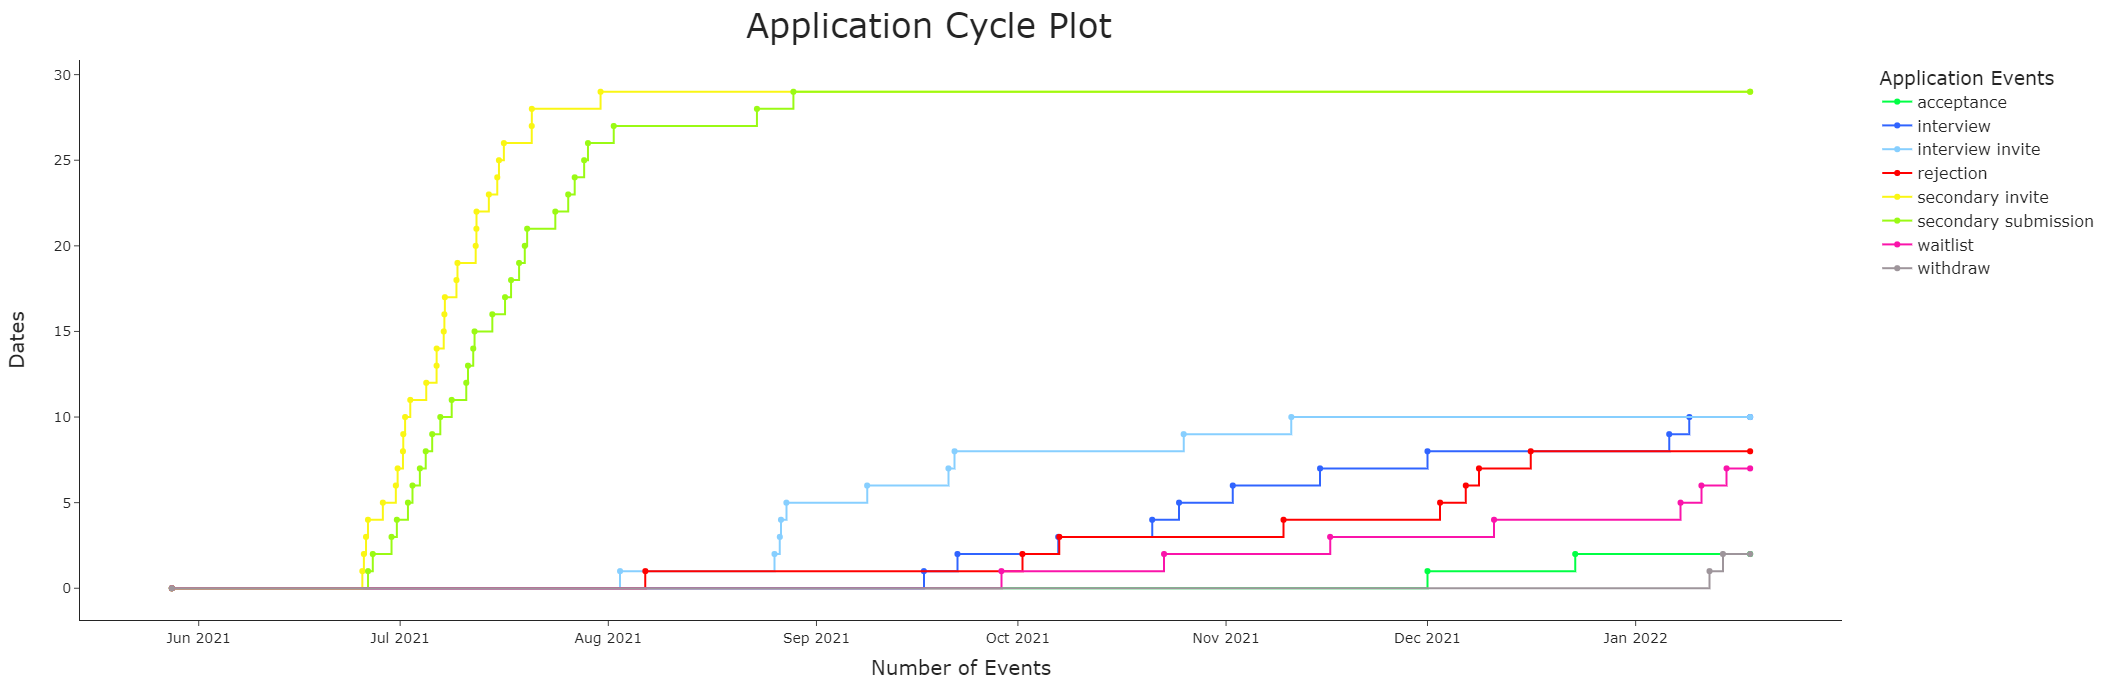

In [35]:
# Plotting the figure
fig = px.line(dan_sort2, x="Dates", y="tracker", color="Actions", 
              hover_data=["schools", "Actions", "Dates"], markers=True, line_shape="hv", color_discrete_map=color_map,
              template=response_answer, width=1200, height=700)
# Updating the figure with title + axes + legend labels, font sizes for the title + x, y ticks + legend size, and x, y axes labels.  Then centering the title.
fig.update_layout(title="Application Cycle Plot",
                 xaxis_title="Number of Events",
                 yaxis_title="Dates",
                 legend_title="Application Events",
                 font=dict(size=24))
fig.update_layout(yaxis=dict(tickfont=dict(size=14)), xaxis=dict(tickfont=dict(size=14)))
fig.update_layout(legend=dict(font=dict(size=16)))
fig.update_xaxes(title_font=dict(size=20))
fig.update_yaxes(title_font=dict(size=20))
fig.update_layout(title={'text': "Application Cycle Plot", 'y':0.98, 'x':0.44, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [8]:
?px.line

Signature:
px.line(
    data_frame=None,
    x=None,
    y=None,
    line_group=None,
    color=None,
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    line_dash_sequence=None,
    line_dash_map=None,
    symbol_sequence=None,
    symbol_map=None,
    markers=False,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    line_shape=None,
    render_mode='auto',
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a 2D line plot, each row of `data_frame` is represented as vertex of
    a pol